In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time


import pandas as pd

from skimage.color import rgb2gray


from skimage.filters.rank import entropy
import scipy


import cv2
import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob
from skimage.morphology import remove_small_objects

from skimage.morphology import disk
from skimage import io

import threading

/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
# odd findings 
#. - found a cell in silice 21-23 wrapped around a blood vessel

In [3]:
#im=io.imread("Stitch_9_G001.tif")
im=io.imread("/Users/spencerlab/Desktop/final_files/Day_5/Stack_day_5.tif")

In [7]:
stacks = 0
green_cell_map = []
for stacks in range(len(im)):

    n = im[stacks]
    hsvs= cv2.cvtColor(n,cv2.COLOR_BGR2HSV)
    #60, 100, 50
    low_green = np.array([58,122,60])
    #[50,122,60]
    high_green = np.array([70,255,255])
    #[73,200,200]
    green_mask = cv2.inRange(hsvs,low_green,high_green)
    f =  green_mask
    
    
    
    

    c = f
    the, c = cv2.threshold(c, 35, 255, cv2.THRESH_BINARY)
    
    
    c= remove_small_objects(c.astype(bool), min_size=8, connectivity=1).astype('uint8')*255
    
    a = Image.fromarray(c)
    green_cell_map.append(c)
    a.save('green2/'+str(stacks)+".tif")
    
    
    
    print(stacks)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260


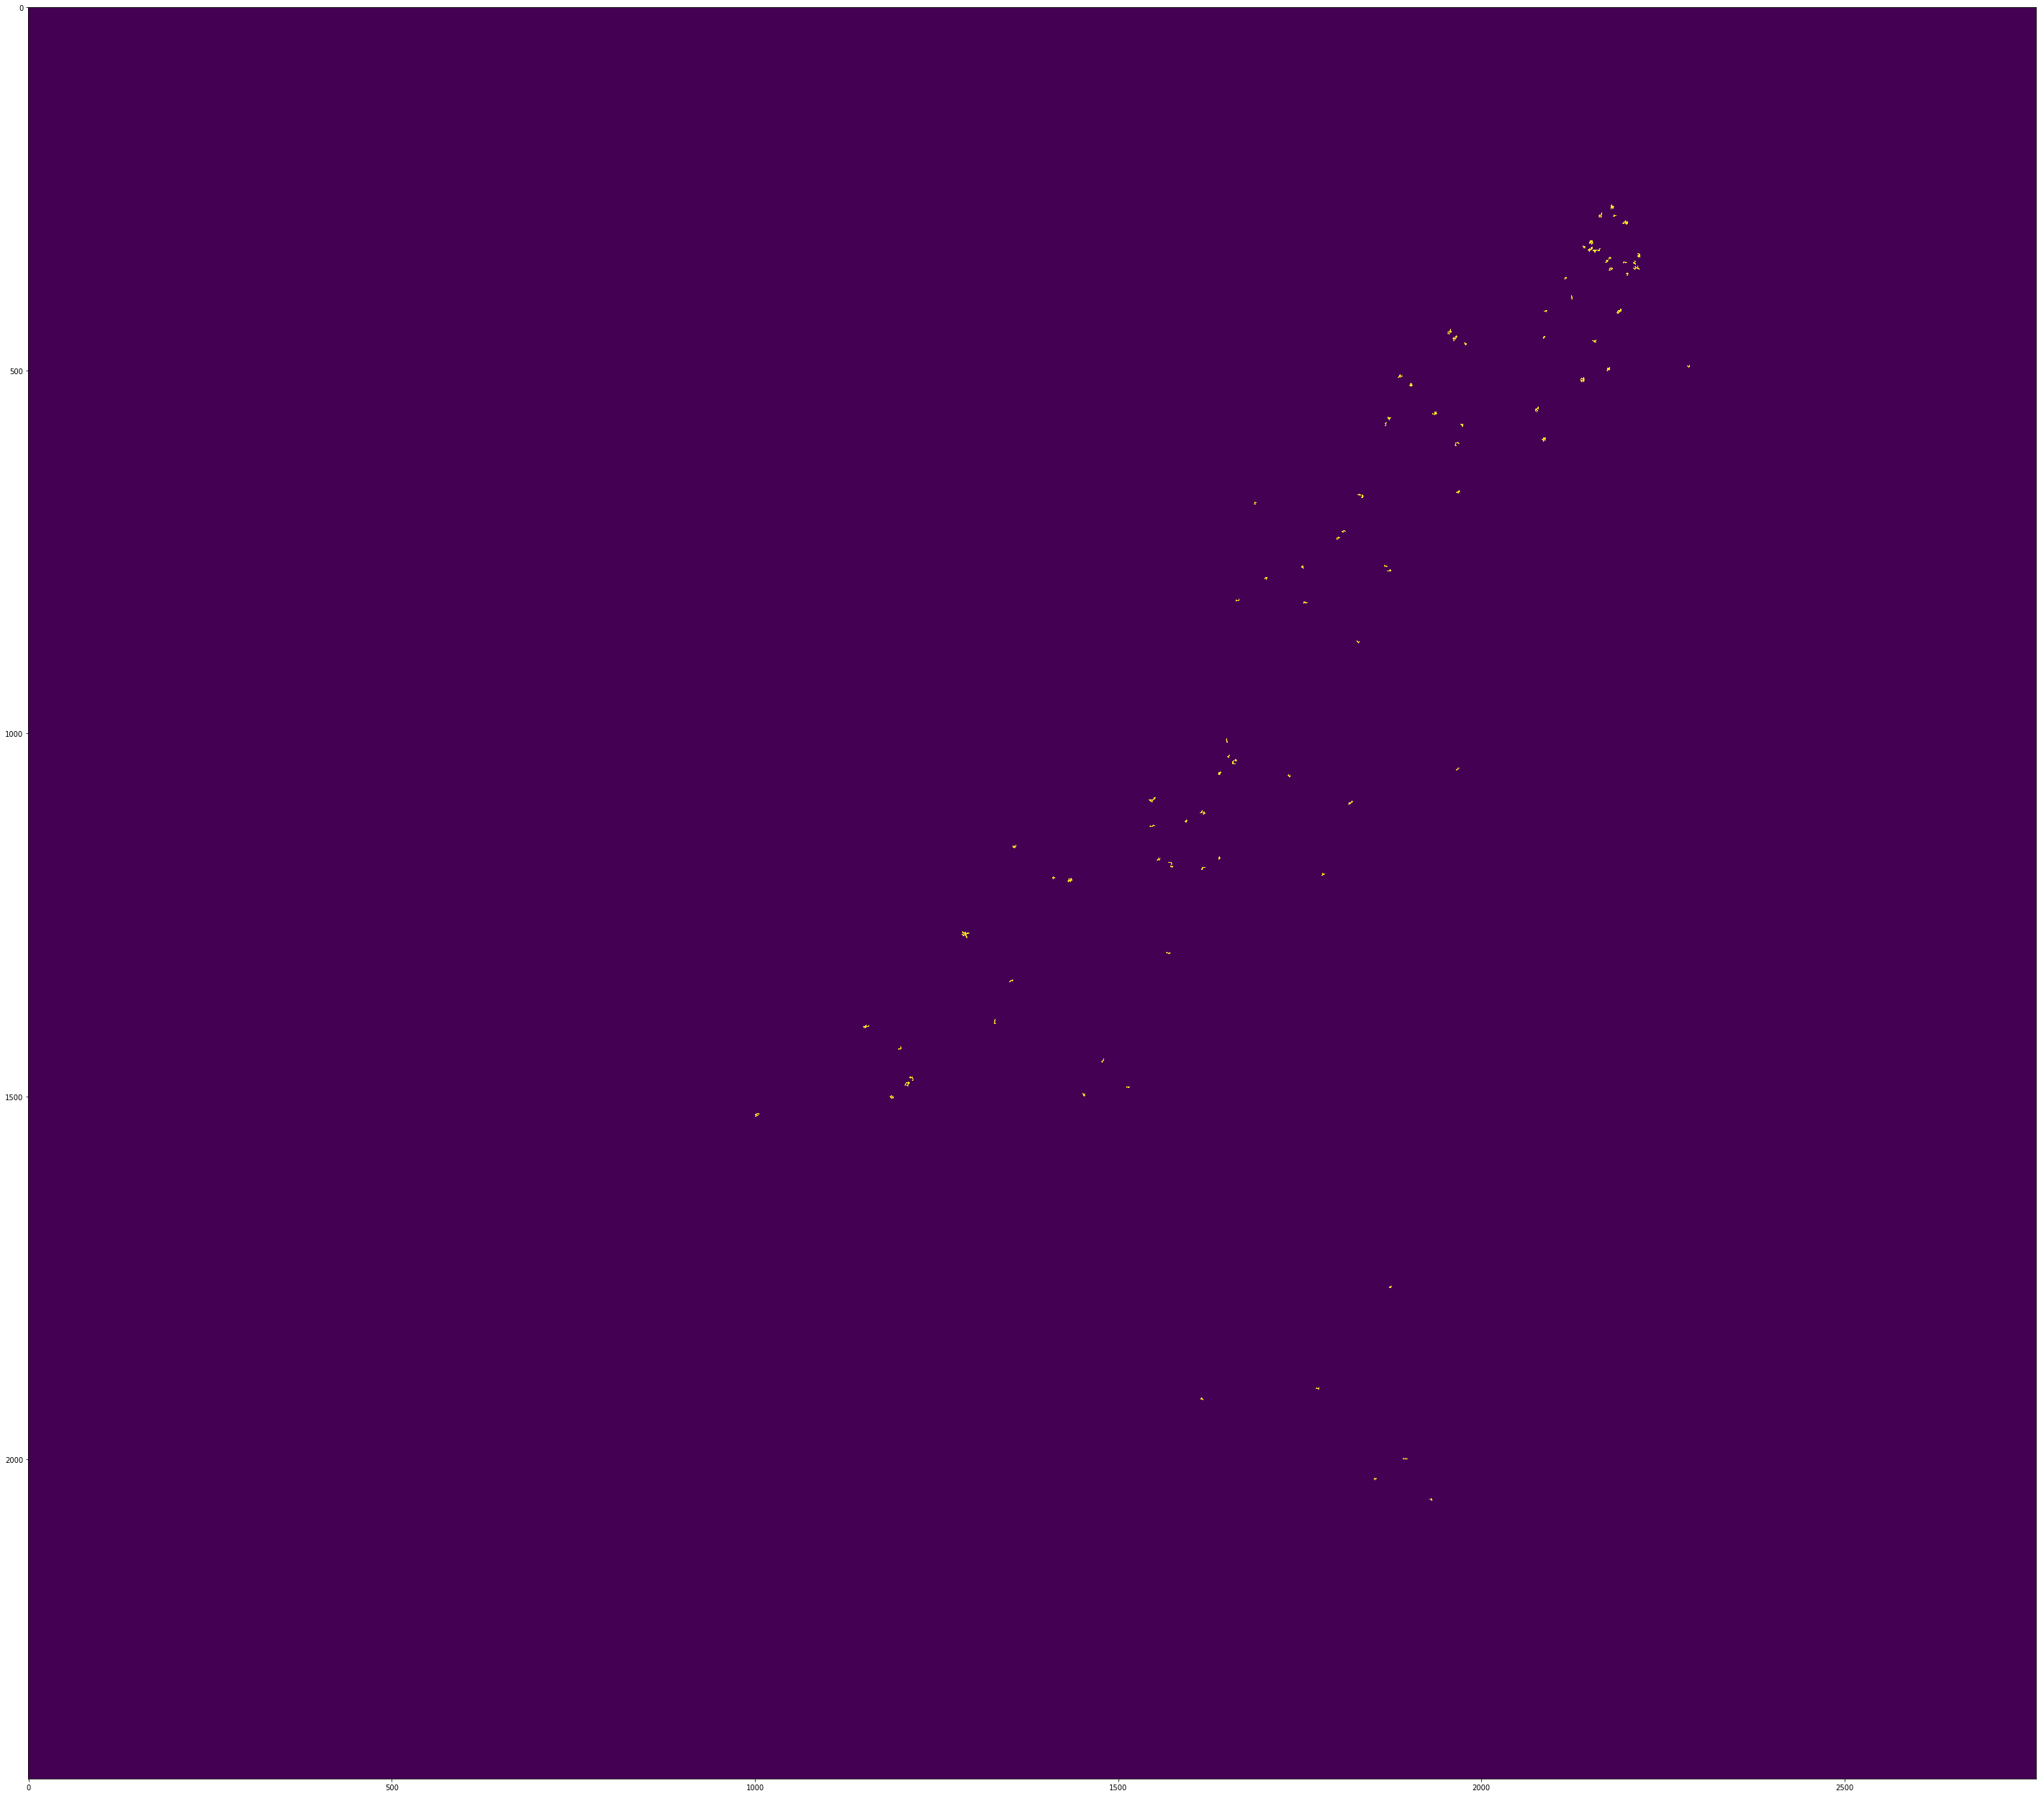

In [6]:
plt.figure(figsize=(50,50))
plt.imshow(green_cell_map[35])

In [25]:
f = np.array(a)

In [27]:
f[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [19]:
im2=io.imread("/Users/spencerlab/Desktop/final_files/Day_5/Green_cells_day_5.tif").astype(bool)


In [20]:
im2.shape

(261, 2440, 2765)

In [21]:
 im2 = remove_small_objects(im2.astype(bool), min_size=(25), connectivity=1)

In [22]:
lab = measure.label(im2,8)

In [23]:
unk = np.unique(lab)

In [24]:
print(len(unk))
#run 1 = 8176
# run 2 = 7480
#run 3 =2
#run 4 = 101
# run 5 = 2
#run 6 = 60
#run 7 = 156
#run 8 = 86
#run 9 = 86

#run

8176


In [19]:
im2[1,1,1]

array([False, False, False])

In [25]:
import threading 
cells_centroid1 = []
cells_centroid2 = []
cells_centroid3 = []
cells_centroid4 = []
cells_centroid5 = []

def Centroid(num1,num2,unk,lab,array): 
    #for i in range(num1, len(unk)):
    lab = lab
    unk=unk
    array = array
    for i in range(num1, num2):
        if i %10 ==0:
            print(str(i)+"   ")
        co_ordinates =np.where(lab==unk[i])
        z_c = sum(co_ordinates[0])/len(co_ordinates[0])
        y_c = sum(co_ordinates[1])/len(co_ordinates[0])
        x_c = sum(co_ordinates[2])/len(co_ordinates[0])

        centroid = [z_c+1, y_c+1, x_c+1, len(co_ordinates[0])]
        array.append(centroid)

  
if __name__ == "__main__": 
    # creating thread 
    x = len(unk)
    b = x/5
    b = int(b)
    t1 = threading.Thread(target=Centroid, args=(0,b+1,unk,lab,cells_centroid1,)) 
    t2 = threading.Thread(target=Centroid, args=(1*b,2*b+1,unk,lab,cells_centroid2,)) 
    t3 = threading.Thread(target=Centroid, args=(2*b,3*b+1,unk,lab,cells_centroid3,) )
    t4 = threading.Thread(target=Centroid, args=(3*b,4*b+1,unk,lab,cells_centroid4,))
    t5 = threading.Thread(target=Centroid, args=(4*b,unk,unk,lab,cells_centroid5,))
    # starting thread 1 
    t1.start() 
    t2.start() 
    t3.start() 
    t4.start()
    t5.start()

    # wait until thread 1 is completely executed 
    t1.join() 
    t2.join() 
    t3.join() 
    t4.join() 
    t5.join() 
    # both threads completely executed 
    print("Done!") 
    
    
    
    

0   
3270   


Exception in thread Thread-8:
Traceback (most recent call last):
  File "/Users/spencerlab/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/Users/spencerlab/anaconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-25-13bf260e9ce0>", line 13, in Centroid
    for i in range(num1, num2):
TypeError: only integer scalar arrays can be converted to a scalar index



4910   1640   

3280   
4920   
1650   10   

3290   
4930   
1660   
20   
3300   
4940   
1670   
30   
3310   
4950   
1680   
40   
3320   
4960   
1690   
50   
3330   
4970   
1700   
60   
3340   
4980   
1710   
70   
3350   
4990   
1720   
80   
3360   
5000   
1730   
90   
3370   
5010   
1740   
100   
3380   
5020   
1750   
110   
3390   
5030   
1760   120   

3400   
5040   
1770   130   

3410   
5050   
1780   140   

3420   
5060   
150   
1790   
3430   
5070   
160   
1800   
3440   
5080   
170   
1810   
3450   
5090   
180   
1820   
3460   
5100   
190   
1830   
3470   
5110   
200   
1840   
3480   
5120   
210   
1850   
3490   
5130   
220   
1860   
3500   
5140   230   

1870   
3510   
240   
5150   
1880   
3520   
250   
5160   
1890   
3530   
260   
5170   
1900   
3540   
270   
5180   
1910   
3550   
280   
5190   
1920   
3560   
290   
5200   
1930   
3570   
300   
5210   
1940   
3580   
310   
5220   
1950   
3590   
320   
5230   
1960   
3

In [26]:
cells_centroid1

[[131.03498610166724, 1220.6902872753872, 1382.8622329215273, 1759886271],
 [1.2962962962962963, 8.851851851851851, 1954.888888888889, 27],
 [2.309236947791165, 12.907630522088354, 2266.9196787148594, 249],
 [1.3647058823529412, 32.56470588235294, 2252.3058823529414, 85],
 [1.72, 47.64, 2267.48, 25],
 [1.3291139240506329, 48.40506329113924, 2246.1645569620255, 79],
 [2.2142857142857144, 59.92857142857143, 2206.8571428571427, 70],
 [3.6130742049469964, 76.31625441696113, 2224.4734982332157, 566],
 [1.1904761904761905, 81.0, 1958.4761904761904, 42],
 [1.4444444444444444, 84.02777777777777, 2140.6111111111113, 36],
 [1.8037383177570092, 88.57009345794393, 2156.308411214953, 214],
 [1.8928571428571428, 102.64285714285714, 1986.625, 56],
 [1.0, 104.7, 2176.133333333333, 30],
 [2.695804195804196, 103.94405594405595, 2156.2027972027972, 286],
 [1.4772727272727273, 109.35227272727273, 2201.7613636363635, 88],
 [1.34, 120.89, 2215.65, 100],
 [1.0, 122.225, 1926.125, 40],
 [4.2444444444444445, 1

In [27]:
cells_centroid = cells_centroid1 + cells_centroid2 + cells_centroid3 + cells_centroid4 + cells_centroid5

In [28]:
len(cells_centroid)

6544

In [29]:
cells_centroid

[[131.03498610166724, 1220.6902872753872, 1382.8622329215273, 1759886271],
 [1.2962962962962963, 8.851851851851851, 1954.888888888889, 27],
 [2.309236947791165, 12.907630522088354, 2266.9196787148594, 249],
 [1.3647058823529412, 32.56470588235294, 2252.3058823529414, 85],
 [1.72, 47.64, 2267.48, 25],
 [1.3291139240506329, 48.40506329113924, 2246.1645569620255, 79],
 [2.2142857142857144, 59.92857142857143, 2206.8571428571427, 70],
 [3.6130742049469964, 76.31625441696113, 2224.4734982332157, 566],
 [1.1904761904761905, 81.0, 1958.4761904761904, 42],
 [1.4444444444444444, 84.02777777777777, 2140.6111111111113, 36],
 [1.8037383177570092, 88.57009345794393, 2156.308411214953, 214],
 [1.8928571428571428, 102.64285714285714, 1986.625, 56],
 [1.0, 104.7, 2176.133333333333, 30],
 [2.695804195804196, 103.94405594405595, 2156.2027972027972, 286],
 [1.4772727272727273, 109.35227272727273, 2201.7613636363635, 88],
 [1.34, 120.89, 2215.65, 100],
 [1.0, 122.225, 1926.125, 40],
 [4.2444444444444445, 1

In [30]:
cells_centroid2 = np.asarray(cells_centroid)

In [32]:
cells_centroid2.shape

(6544, 4)

In [35]:
df = pd.DataFrame(cells_centroid2)

In [38]:
df.to_csv('GreenCells_Day3_#2.csv')

In [74]:
stacks = 0
while True:
    #n= cv2.GaussianBlur(im[stacks],(1,1),0)
    
    n = im2[stacks]
    a = Image.fromarray(n)
    
    
    a.save('red3/'+str(stacks)+".tif")
    stacks+=1
    print(stacks)
    if stacks>274:
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


IndexError: index 274 is out of bounds for axis 0 with size 274

In [9]:
import glob
from skimage.external import tifffile
with tifffile.TiffWriter('dethyin.tif') as stack:
    i = 0
    for filename in glob.glob('dethyin/*.tif'):
        fname= 'dethyin/'+str(i)+'.tif'
        print(fname)
        i=i+1
        stack.save(tifffile.imread(fname))

dethyin/0.tif
dethyin/1.tif
dethyin/2.tif
dethyin/3.tif
dethyin/4.tif
dethyin/5.tif
dethyin/6.tif
dethyin/7.tif
dethyin/8.tif
dethyin/9.tif
dethyin/10.tif
dethyin/11.tif
dethyin/12.tif
dethyin/13.tif
dethyin/14.tif
dethyin/15.tif
dethyin/16.tif
dethyin/17.tif
dethyin/18.tif
dethyin/19.tif
dethyin/20.tif
dethyin/21.tif
dethyin/22.tif
dethyin/23.tif
dethyin/24.tif
dethyin/25.tif
dethyin/26.tif
dethyin/27.tif
dethyin/28.tif
dethyin/29.tif
dethyin/30.tif
dethyin/31.tif
dethyin/32.tif
dethyin/33.tif
dethyin/34.tif
dethyin/35.tif
dethyin/36.tif
dethyin/37.tif
dethyin/38.tif
dethyin/39.tif
dethyin/40.tif
dethyin/41.tif
dethyin/42.tif
dethyin/43.tif
dethyin/44.tif
dethyin/45.tif
dethyin/46.tif
dethyin/47.tif
dethyin/48.tif
dethyin/49.tif
dethyin/50.tif
dethyin/51.tif
dethyin/52.tif
dethyin/53.tif
dethyin/54.tif
dethyin/55.tif
dethyin/56.tif
dethyin/57.tif
dethyin/58.tif
dethyin/59.tif
dethyin/60.tif
dethyin/61.tif
dethyin/62.tif
dethyin/63.tif
dethyin/64.tif
dethyin/65.tif
dethyin/66.tif
dethy

ValueError: data too large for non-bigtiff file

In [12]:
stk = []
i = 0
for filename in glob.glob('dethy/*.tif'):
    fname= 'dethy/'+str(i)+'.tif'
    stk.append(     (np.asarray(Image.open(fname))*255).astype('uint8')   )
    i=i+1

In [14]:
import glob
from skimage.external import tifffile
with tifffile.TiffWriter('thymus_edge_denoised_1.tif') as stack:
    for i in range(len(stk)):
        stack.save(stk[i])

In [ ]:
tifffile.imsave()

In [8]:
(stk[50]).dtype

dtype('float32')

In [3]:
im = io.imread('/Users/spencerlab/Desktop/final_files/Green_cells_day_3.tif')

In [ ]:
 f = remove_small_objects(f.astype(bool), min_size=(lmao-10), connectivity=1)